In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn import metrics
import seaborn as sn
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

Veride aslında eksiklik yoktur fakat evlerde bulunmayan öznitelikler Nan olarak kaydedilmiştir. Bu verilerin kolay işlenebilmesi adına "Nan" veriler "0" ile doldurulur.

In [2]:
TRAIN_PATH = 'C:\\Users\\mychu\\Workspace\\ML_Paper\\data\\train.csv'
TEST_PATH = 'C:\\Users\\mychu\\Workspace\\ML_Paper\\data\\test.csv'
TEST_TARGET_PATH = 'C:\\Users\\mychu\\Workspace\\ML_Paper\\data\\testtarget.csv'

df = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH) # hedef sütunu içermiyor
df_correct = pd.read_csv(TEST_TARGET_PATH)

In [3]:
le = preprocessing.LabelEncoder()

In [4]:
# TRAIN

In [5]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical = df_categorical.fillna("none")
for column in df_categorical:
    df_categorical[column] = le.fit_transform(df_categorical[column])

In [6]:
df_numerical = df.select_dtypes(include=['int64','float64'])

for column in df_numerical:
    df_numerical[column] = df_numerical[column].fillna(df_numerical[column].mean())

df_new = df_categorical.join(df_numerical)

c:\users\mychu\workspace\ml_paper\ml_env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
# TEST

In [8]:
df_test_categorical = df_test.select_dtypes(include=['object'])

df_test_categorical = df_test_categorical.fillna("none")

for column in df_test_categorical:
    df_test_categorical[column] = le.fit_transform(df_test_categorical[column])

In [9]:
df_test_numerical = df_test.select_dtypes(include=['int64','float64'])

for column in df_test_numerical:
    df_test_numerical[column] = df_test_numerical[column].fillna(df_test_numerical[column].mean())

df_test_new = df_test_categorical.join(df_test_numerical)

c:\users\mychu\workspace\ml_paper\ml_env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
corr = df_new.corr()
high_correlated_columns = corr[abs(corr["SalePrice"])>0.2].index
high_correlated_columns = high_correlated_columns.drop("SalePrice")

<AxesSubplot:>

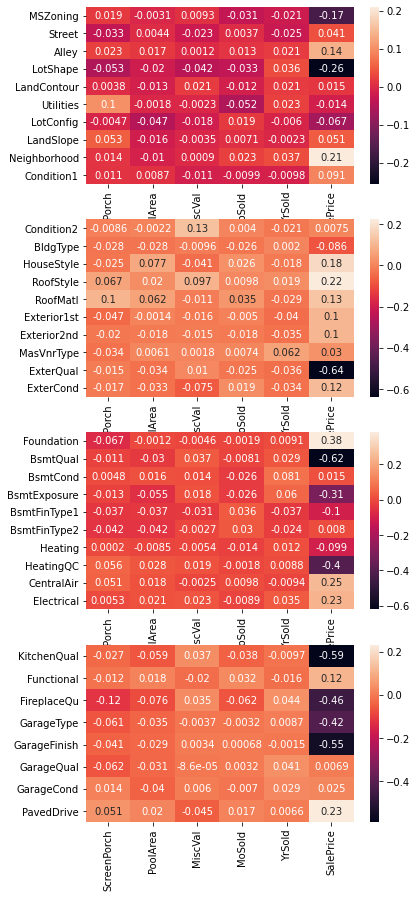

In [11]:
fig = plt.figure(figsize = (6,15))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sn.heatmap(corr.iloc[:10,-6:]  , annot=True, ax=ax1)
sn.heatmap(corr.iloc[10:20,-6:], annot=True, ax=ax2)
sn.heatmap(corr.iloc[20:30,-6:], annot=True, ax=ax3)
sn.heatmap(corr.iloc[30:38,-6:], annot=True, ax=ax4)

Hedef öznitelik veriden ayrıştırılır ve Y olarak saklanır. Geri kalan özniteikler "MinMaxScaler" kullanılarak
normalize edilir. Normalize edilmiş öznitelik değerleri X olarak saklanır.

In [45]:
x_train = df_new[high_correlated_columns].values
x_test = df_test_new[high_correlated_columns].values

In [46]:
y_test = df_correct["SalePrice"]
y_train = df["SalePrice"]

In [47]:
y_train_max = max(y_train.values)
y_train_min = min(y_train.values)
y_train = (y_train-y_train_min)/(y_train_max-y_train_min)

In [48]:
y_test_max = max(y_test.values)
y_test_min = min(y_test.values)
y_test = (y_test-y_test_min)/(y_test_max-y_test_min)

In [49]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)

In [50]:
np.std(y_train)

np.std(y_test)

full = np.concatenate((y_train,y_test))

std_dev = np.std(full)

0.11028369932796486

In [54]:
y_train = np.array([int((x/(std_dev*2))) for x in y_train])
y_test = np.array([int((x/(std_dev*2))) for x in y_test])

In [75]:
np.unique(y_test)

array([0, 1, 2, 3])

In [59]:
gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)

In [ ]:
#Training Data

In [60]:
y_pred = gnb.predict(x_train)

In [61]:
conf_matrix = confusion_matrix(y_train,y_pred)
print(conf_matrix)
print("Total Accuracy---------------------------------")



conf_vals = []
for i in range(conf_matrix.shape[0]):
    TP = conf_matrix[i,i]
    FP = conf_matrix[i,:].sum() - TP
    FN = conf_matrix[:,i].sum() - TP
    TN = conf_matrix.sum() - (TP + FP + FN)
    conf_vals.append([TP,FP,FN,TN])
conf_vals = np.array(conf_vals)

# Total Accuracy = (TP + TN)/(TP + TN + FP + FN)
acc = (y_train == y_pred).sum()/y_train.shape[0]
print(f"Accuracy:{acc}")
print("Accuracy---------------------------------")





# Accuracy = (TP + TN)/(TP + TN + FP + FN)
for i in range(conf_matrix.shape[0]):
    s = (conf_vals[i,0] + conf_vals[i,3]) / conf_vals[i,:].sum()
    print(f"Sınıf{i} = {s}")
    
    
    
    


print("Sensitivity------------------------------------")
# Sensitivity = TP / TP + FN
sm = 0
for i in range(conf_matrix.shape[0]):
    s = conf_vals[i,0] / (conf_vals[i,0] + conf_vals[i,2])
    if not (np.isnan(s)):
        sm += s
        
    print(f"Sınıf{i} = TP({conf_vals[i,0]}) / (TP({conf_vals[i,0]}) + FN({conf_vals[i,2]})) = {s}")
print(f"avg = {sm/conf_matrix.shape[0]}")   






print("Specificity-----------------------------------")
# Specificity = TN / TN + FP
sm = 0
for i in range(conf_matrix.shape[0]):
    s = conf_vals[i,3] / (conf_vals[i,3] + conf_vals[i,1])
    if not (np.isnan(s)):
        sm += s
    print(f"Sınıf{i} = TN({conf_vals[i,3]}) / (TN({conf_vals[i,3]})+FP({conf_vals[i,1]})) = {s}")
print(f"avg = {sm/conf_matrix.shape[0]}") 




print("Precision-----------------------------------")
##### Precision = TP / TP + FP
sm = 0
for i in range(conf_matrix.shape[0]):
    s = conf_vals[i,0] / (conf_vals[i,0] + conf_vals[i,1])
    if not (np.isnan(s)):
        sm += s
    print(f"Sınıf{i} = TP({conf_vals[i,0]}) / (TP({conf_vals[i,0]}) + FP({conf_vals[i,1]})) = {s}")
print(f"avg = {sm/conf_matrix.shape[0]}") 

[[901 128  91   0]
 [ 19  75 220   1]
 [  0   0  20   1]
 [  0   0   0   4]]
Total Accuracy---------------------------------
Accuracy:0.684931506849315
Accuracy---------------------------------
Sınıf0 = 0.836986301369863
Sınıf1 = 0.7479452054794521
Sınıf2 = 0.7863013698630137
Sınıf3 = 0.9986301369863013
Sensitivity------------------------------------
Sınıf0 = TP(901) / (TP(901) + FN(19)) = 0.9793478260869565
Sınıf1 = TP(75) / (TP(75) + FN(128)) = 0.3694581280788177
Sınıf2 = TP(20) / (TP(20) + FN(311)) = 0.06042296072507553
Sınıf3 = TP(4) / (TP(4) + FN(2)) = 0.6666666666666666
avg = 0.5189738953893791
Specificity-----------------------------------
Sınıf0 = TN(321) / (TN(321)+FP(219)) = 0.5944444444444444
Sınıf1 = TN(1017) / (TN(1017)+FP(240)) = 0.8090692124105012
Sınıf2 = TN(1128) / (TN(1128)+FP(1)) = 0.9991142604074402
Sınıf3 = TN(1454) / (TN(1454)+FP(0)) = 1.0
avg = 0.8506569793155965
Precision-----------------------------------
Sınıf0 = TP(901) / (TP(901) + FP(219)) = 0.8044642857142

In [ ]:
#Test Data

In [71]:
y_pred = gnb.predict(x_test)

In [73]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print("Total Accuracy---------------------------------")



conf_vals = []
for i in range(conf_matrix.shape[0]):
    TP = conf_matrix[i,i]
    FP = conf_matrix[i,:].sum() - TP
    FN = conf_matrix[:,i].sum() - TP
    TN = conf_matrix.sum() - (TP + FP + FN)
    conf_vals.append([TP,FP,FN,TN])
conf_vals = np.array(conf_vals)

# Total Accuracy = (TP + TN)/(TP + TN + FP + FN)
acc = (y_test == y_pred).sum()/y_test.shape[0]
print(f"Accuracy:{acc}")
print("Accuracy---------------------------------")





# Accuracy = (TP + TN)/(TP + TN + FP + FN)
for i in range(conf_matrix.shape[0]):
    s = (conf_vals[i,0] + conf_vals[i,3]) / conf_vals[i,:].sum()
    print(f"Sınıf{i} = {s}")
    
    
    
    


print("Sensitivity------------------------------------")
# Sensitivity = TP / TP + FN
sm = 0
for i in range(conf_matrix.shape[0]):
    s = conf_vals[i,0] / (conf_vals[i,0] + conf_vals[i,2])
    if not (np.isnan(s)):
        sm += s
        
    print(f"Sınıf{i} = TP({conf_vals[i,0]}) / (TP({conf_vals[i,0]}) + FN({conf_vals[i,2]})) = {s}")
print(f"avg = {sm/conf_matrix.shape[0]}")   






print("Specificity-----------------------------------")
# Specificity = TN / TN + FP
sm = 0
for i in range(conf_matrix.shape[0]):
    s = conf_vals[i,3] / (conf_vals[i,3] + conf_vals[i,1])
    if not (np.isnan(s)):
        sm += s
    print(f"Sınıf{i} = TN({conf_vals[i,3]}) / (TN({conf_vals[i,3]})+FP({conf_vals[i,1]})) = {s}")
print(f"avg = {sm/conf_matrix.shape[0]}") 




print("Precision-----------------------------------")
##### Precision = TP / TP + FP
sm = 0
for i in range(conf_matrix.shape[0]):
    s = conf_vals[i,0] / (conf_vals[i,0] + conf_vals[i,1])
    if not (np.isnan(s)):
        sm += s
    print(f"Sınıf{i} = TP({conf_vals[i,0]}) / (TP({conf_vals[i,0]}) + FP({conf_vals[i,1]})) = {s}")
print(f"avg = {sm/conf_matrix.shape[0]}") 

[[745  55   0   0]
 [170 400   0   0]
 [  0  78   0   0]
 [  0  11   0   0]]
Total Accuracy---------------------------------
Accuracy:0.7847840986977381
Accuracy---------------------------------
Sınıf0 = 0.8457847840986977
Sınıf1 = 0.7847840986977381
Sınıf2 = 0.9465387251542152
Sınıf3 = 0.9924605894448252
Sensitivity------------------------------------
Sınıf0 = TP(745) / (TP(745) + FN(170)) = 0.8142076502732241
Sınıf1 = TP(400) / (TP(400) + FN(144)) = 0.7352941176470589
Sınıf2 = TP(0) / (TP(0) + FN(0)) = nan
Sınıf3 = TP(0) / (TP(0) + FN(0)) = nan
avg = 0.38737544198007073
Specificity-----------------------------------
Sınıf0 = TN(489) / (TN(489)+FP(55)) = 0.8988970588235294
Sınıf1 = TN(745) / (TN(745)+FP(170)) = 0.8142076502732241
Sınıf2 = TN(1381) / (TN(1381)+FP(78)) = 0.9465387251542152
Sınıf3 = TN(1448) / (TN(1448)+FP(11)) = 0.9924605894448252
avg = 0.9130260059239484
Precision-----------------------------------
Sınıf0 = TP(745) / (TP(745) + FP(55)) = 0.93125
Sınıf1 = TP(400) / (TP(

c:\users\mychu\workspace\ml_paper\ml_env\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in longlong_scalars
